# Baseline

### Imports

In [ ]:
from google.colab import drive
import os

import torch
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

from torch import nn
import torch.nn.init as init
import torch.optim as optim

import numpy as np
import pandas as pd

### Mounting Google Drive

In [ ]:
drive.mount('/content/drive/', force_remount=True)

# Define the root folder paths
GDrivePath = '/content/drive/MyDrive/'

# Specify the folder path
folderpath = GDrivePath + 'Colab Notebooks/Computer Vision & Pattern Recognition/Progetto_CV&PR_Finale/'

# Define folder paths for train and test images
train_filepath = folderpath + 'train/'
test_filepath = folderpath + 'test/'

Mounted at /content/drive/


### Import some modules made by us

In [ ]:
# Change directory
os.chdir(folderpath)
!pwd

/content/drive/MyDrive/Colab Notebooks/Computer Vision & Pattern Recognition/Progetto_CV&PR_Finale


In [ ]:
from datasets_utilities import show_images, load_images_from_folder
from training_utilities import train_CNN

## Dataloaders initialization

In [ ]:
# Transform to resize images to 64x64 pixels
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x * 255.0)  # Rescale pixel values back to [0, 255]
])

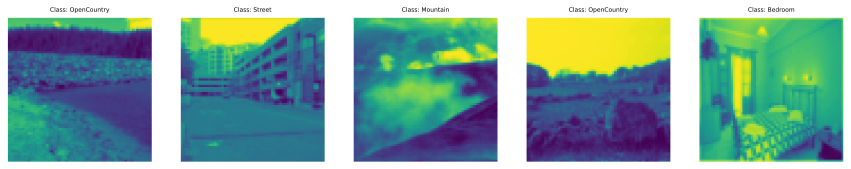

In [ ]:
# For the baseline set batch size to 32
batch_size = 32

#Load training and test images
train_set, train_labels = load_images_from_folder(train_filepath, transform)
test_set, test_labels = load_images_from_folder(test_filepath, transform)

# Split training images to create training (85%) and validation (15%) sets
train_set, val_set, train_labels, val_labels = train_test_split(
    train_set, train_labels, test_size=0.15, random_state=42, stratify=train_labels
)

show_images(train_set, train_labels)

# Create PyTorch datasets
train_set = torch.utils.data.TensorDataset(torch.stack(train_set), torch.tensor(train_labels))
val_set = torch.utils.data.TensorDataset(torch.stack(val_set), torch.tensor(val_labels))
test_set = torch.utils.data.TensorDataset(torch.stack(test_set), torch.tensor(test_labels))

# Create DataLoaders
train_set = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_set = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_set = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

### CNN model declaration

In [ ]:
# Class to initialize a CNN with the given layout

class CNN_1(nn.Module):

    # Function to initialize the layers
    def __init__(self):
        super(CNN_1, self).__init__() #The attributes and methods from nn.Module are inherited and available in the CNN_1 class.

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()

        self.fc4 = nn.Linear(32 * 16 * 16, 15)

        #self.softmax5 = nn.Softmax(dim=1) # Unnecessary if Cross Entropy is used as loss function

        self.initialize_weights()

    # Function for weights initialization
    def initialize_weights(self):
        for m in self.modules(): # Iteration over CNN_1 layers (modules)
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear): # Only convolutional and fully connected layers are considered, max pools and ReLUs do not have weights
                init.normal_(m.weight, mean=0, std=0.01) # Normal distribution to initialize weights
                init.constant_(m.bias, 0) # Biases are initialized at 0

    # Forward pass through the layers
    def forward(self, x):

        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.relu3(x)

        x = x.view(-1, 32 * 16 * 16)  # Flatten the output for the fully connected layer
        x = self.fc4(x)

        #x = self.softmax5(x) # Unnecessary if Cross Entropy is used as loss function

        return x

### Fine tuning

In [ ]:
def exp_1_fineTuning_lr_mo(lr, mo):
            _, current_test_accuracy, current_model_epoch = train_CNN(CNN_1(), MAX_epochs, MAX_patience, lr, momentum = mo, train_loader = train_set,
                              validation_loader = val_set, test_loader = test_set,
                              show_update_loss_acc = False, show_plots_loss_acc = False,
                              show_confusion_matrix = False, test_testSet = True, optimizer_function= optim.SGD)
            return current_test_accuracy, current_model_epoch

In [ ]:
#################################################################################

n_realizations = 5

learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5]
momentums = [0.1, 0.3, 0.5, 0.7, 0.9]

MAX_epochs = 60
MAX_patience = 12

n_pairs = len(learning_rates) * len(momentums)


column_titles = [(lr, mo) for lr in learning_rates for mo in momentums]

df_accuracy_greedy_search = pd.DataFrame()
df_epoch_greedy_search = pd.DataFrame()

print("___________________________________________________________________________________________________________________________________________________________________________________________________________")
print("___________________________________________________________________________________________________________________________________________________________________________________________________________")
print(f"HYPERPARAMETERS PAIRS EXPLORED {n_pairs}")
print("\n\n")

pair_counter = 1
for i, lr in enumerate(learning_rates):
    for j, mo in enumerate(momentums):


        current_accuracy_results_n_realizations = []
        current_epoch_results_n_realizations = []
        for k in range(n_realizations):
            print("°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°")
            print("°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°")
            print(f"RUN {pair_counter} OF {n_pairs*n_realizations}")
            print("TRAINING RATE: {} | MOMENTUM: {}".format(lr, mo))
            print("Realization: {} of {}".format(k+1, n_realizations))
            print("---")

            current_test_accuracy, current_best_epoch = exp_1_fineTuning_lr_mo(lr, mo)
            current_accuracy_results_n_realizations.append(current_test_accuracy)
            current_epoch_results_n_realizations.append(current_best_epoch)

            pair_counter += 1
            print("\n\n\n")


        df_accuracy_greedy_search['({}, {})'.format(lr, mo)] = current_accuracy_results_n_realizations
        df_epoch_greedy_search['({}, {})'.format(lr, mo)] = current_epoch_results_n_realizations

        print("\n\n")

# Save cumulative results in CSV files
df_accuracy_greedy_search.to_csv('exp_1_fineTuning_Accuracy.csv', index=False)
df_epoch_greedy_search.to_csv('exp_1_fineTuning_Epoch.csv', index=False)


Output streaming troncato alle ultime 5000 righe.
Staring epoch  47 ...
Staring epoch  48 ...
Staring epoch  49 ...
Staring epoch  50 ...
Staring epoch  51 ...
Staring epoch  52 ...
Staring epoch  53 ...


TRAINING ENDED!


TRAINING- and VALIDATION-SET STATISTICS
Best model obtained in epoch: 40


____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 16 %




°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
RUN 28 OF 125
TRAINING RATE: 0.001 | MOMENTUM: 0.1
Realization: 3 of 5
---
Staring epoch   0 ...
Staring epoch   1 ...
Staring epoch   2 ...
Staring epoch   3 ...
Staring epoch   4 ...
Staring epoch   5 ...
Staring epoch   6 ...
Staring epoch   7 ...
Staring epoch   8 ...
Staring epoch   

### Results analysis

In [ ]:
# Load files conatining the cumulative results
df_accuracy_greedy_search = pd.read_csv('exp_1_fineTuning_Accuracy.csv')
df_epoch_greedy_search = pd.read_csv('exp_1_fineTuning_Epoch.csv')

In [ ]:
# Compute sample average accuracy for each hyper-parameters couple
average_accuracy = df_accuracy_greedy_search.mean()

# Descending order
average_accuracy_ordered = average_accuracy.sort_values(ascending=False)

# Display resulst
print("   (lr, mt)   |   Average accuracy (descending order):\n")
print(average_accuracy_ordered)

   (lr, mt)   |   Average accuracy (descending order):

(0.001, 0.9)     0.267021
(0.001, 0.5)     0.254979
(0.001, 0.7)     0.253879
(0.001, 0.3)     0.215795
(0.001, 0.1)     0.175783
(0.0001, 0.9)    0.173397
(0.01, 0.1)      0.167923
(0.01, 0.3)      0.152246
(0.01, 0.5)      0.146402
(0.01, 0.7)      0.108223
(0.0001, 0.3)    0.084826
(0.0001, 0.7)    0.076337
(0.5, 0.9)       0.075421
(0.5, 0.7)       0.074150
(0.0001, 0.1)    0.074017
(0.01, 0.9)      0.072481
(0.0001, 0.5)    0.069991
(0.1, 0.9)       0.067465
(0.5, 0.5)       0.067228
(0.1, 0.1)       0.066704
(0.1, 0.5)       0.066371
(0.1, 0.3)       0.063438
(0.5, 0.3)       0.063372
(0.1, 0.7)       0.056198
(0.5, 0.1)       0.052600
dtype: float64


In [ ]:
# Compute sample average best_epoch for each hyper-parameters couple
average_epoch = df_epoch_greedy_search.mean()

# Ascending order
average_epoch_ordered = average_epoch.sort_values(ascending=True)

# Display resulst
print("   (lr, mt)   |   Average best_epoch (ascending order):\n")
print(average_epoch_ordered)

   (lr, mt)   |   Average best_epoch (ascending order):

(0.01, 0.7)       5.0
(0.01, 0.5)       5.8
(0.1, 0.1)        6.0
(0.5, 0.5)        7.8
(0.5, 0.3)        9.0
(0.1, 0.9)        9.0
(0.1, 0.7)        9.0
(0.5, 0.1)        9.4
(0.01, 0.9)       9.4
(0.01, 0.1)      11.0
(0.5, 0.7)       11.4
(0.5, 0.9)       11.4
(0.01, 0.3)      11.8
(0.001, 0.9)     13.2
(0.0001, 0.1)    13.4
(0.1, 0.5)       13.8
(0.0001, 0.7)    14.6
(0.0001, 0.3)    14.8
(0.1, 0.3)       15.0
(0.001, 0.7)     20.2
(0.001, 0.5)     25.2
(0.0001, 0.5)    29.4
(0.0001, 0.9)    32.0
(0.001, 0.1)     33.2
(0.001, 0.3)     36.2
dtype: float64


In [ ]:
from scipy.stats import ttest_ind

# Compute sample average accuracy for each hyper-parameters couple
means = df_accuracy_greedy_search.mean()

# Find the couple with highest average
max_mean_column = means.idxmax()

results = []

# Computing for each column (except max_average) the Welch's t-test for the null hypotesis: "max_average = other_average"
for column in df_accuracy_greedy_search.columns:
    if column != max_mean_column:
        _, p_value = ttest_ind(df_accuracy_greedy_search[max_mean_column], df_accuracy_greedy_search[column], equal_var=False)

        results.append((column, p_value))

# Display resulst in descending order of p-value
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

print(f"Highest average accuracy: {df_accuracy_greedy_search[max_mean_column].mean()}")
print(f"Best-pair: {max_mean_column}\n\n")

print(f"Computing for each other pairs, except {max_mean_column}, the Welch's t-test for the null hypotesis: best_average == other_average")
print(f"Results are printed with p-value in descending order\n")

for result in results_sorted:
    print(f"{result[0]:<14} vs  Best-pair:    p-value = {result[1]:.6f}")

# If p-value is smaller than the treshold, the null hypotesis is rejected

Highest average accuracy: 0.26702127659574465
Best-pair: (0.001, 0.9)


Computing for each othe pairs, except (0.001, 0.9), the Welch's t-test for the null hypotesis: best_average == other_average
Results are printed with p-value in descending order

(0.001, 0.5)   vs  Best-pair:    p-value = 0.453672
(0.001, 0.7)   vs  Best-pair:    p-value = 0.379413
(0.0001, 0.9)  vs  Best-pair:    p-value = 0.075768
(0.001, 0.3)   vs  Best-pair:    p-value = 0.074853
(0.01, 0.1)    vs  Best-pair:    p-value = 0.026966
(0.01, 0.7)    vs  Best-pair:    p-value = 0.008579
(0.01, 0.3)    vs  Best-pair:    p-value = 0.002415
(0.01, 0.5)    vs  Best-pair:    p-value = 0.000491
(0.001, 0.1)   vs  Best-pair:    p-value = 0.000348
(0.0001, 0.5)  vs  Best-pair:    p-value = 0.000029
(0.5, 0.7)     vs  Best-pair:    p-value = 0.000026
(0.5, 0.5)     vs  Best-pair:    p-value = 0.000012
(0.0001, 0.7)  vs  Best-pair:    p-value = 0.000004
(0.1, 0.7)     vs  Best-pair:    p-value = 0.000004
(0.1, 0.5)     vs  Be

### Testing the best hyper-parameterers pair

Staring epoch   0 ...
   ACCURACY: train  6.4 % | validation  3.5 %
       LOSS: train  2.708 | validation  2.707
Staring epoch   1 ...
   ACCURACY: train  6.5 % | validation  5.5 %
       LOSS: train  2.707 | validation  2.705
Staring epoch   2 ...
   ACCURACY: train  7.7 % | validation  6.2 %
       LOSS: train  2.701 | validation  2.698
Staring epoch   3 ...
   ACCURACY: train 10.8 % | validation  6.6 %
       LOSS: train  2.672 | validation  2.704
Staring epoch   4 ...
   ACCURACY: train 12.1 % | validation 12.5 %
       LOSS: train  2.638 | validation  2.707
Staring epoch   5 ...
   ACCURACY: train 17.4 % | validation 14.8 %
       LOSS: train  2.576 | validation  2.651
Staring epoch   6 ...
   ACCURACY: train 16.9 % | validation 28.9 %
       LOSS: train  2.544 | validation  2.563
Staring epoch   7 ...
   ACCURACY: train 20.2 % | validation 16.0 %
       LOSS: train  2.537 | validation  2.558
Staring epoch   8 ...
   ACCURACY: train 21.9 % | validation 15.2 %
       LOSS: train  

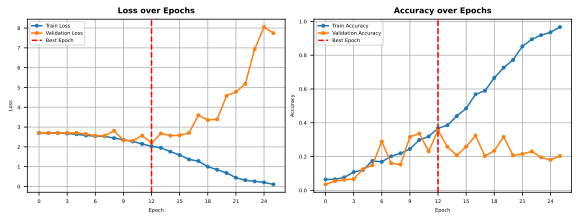



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 25 %




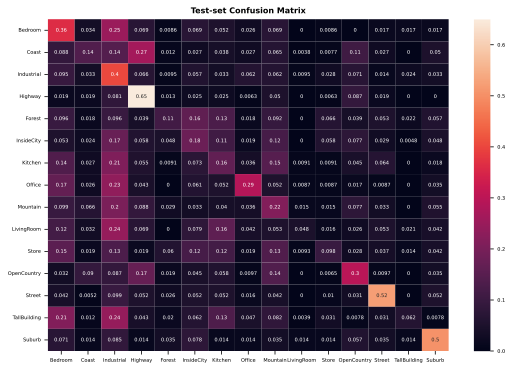

In [ ]:
_, current_test_accuracy, current_model_epoch = train_CNN(CNN_1(), MAX_epochs=60, MAX_patience=12, learning_rate=0.001, momentum = 0.9, train_loader = train_set,
                              validation_loader = val_set, test_loader = test_set,
                              show_update_loss_acc = True, show_plots_loss_acc = True,
                              show_confusion_matrix = True, test_testSet = True, optimizer_function= optim.SGD)